# Geospatial data analysis with Python

### Setting up the environment

run in terminal:

```python
    conda create -n pygeo
    conda activate pygeo
    conda install ipykernel
    python -m ipykernel install --user --name pygeo --display-name "PyGeo"
```

Now you should be able to select the kernel PyGeo for the Jupyter Notebook (maybe you need to restart your IDE).

Checking your python version:

In [1]:
! python -V

Python 3.12.3


Now we can install the required geo packages:

In [4]:
! pip install geopandas
! pip install matplotlib

# for interactive maps, we need folium and mapclassify
! pip install folium
! pip install mapclassify

# these packages are needed for OSM
! pip install osmnx
! pip install pyrosm

Let's print some package versions for debugging purposes:

In [31]:
! pip show shapely

Name: shapely
Version: 2.0.4
Summary: Manipulation and analysis of geometric objects
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: /Users/alexandra/opt/anaconda3/envs/pygeo/lib/python3.12/site-packages
Requires: numpy
Required-by: geopandas, osmnx, pyrosm


In [7]:
! pip show geopandas

Name: geopandas
Version: 0.14.4
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /Users/alexandra/opt/anaconda3/envs/pygeo/lib/python3.12/site-packages
Requires: fiona, numpy, packaging, pandas, pyproj, shapely
Required-by: 


## Vector data classes

*The code is mainly adapted from [Geocomputation with Python by Dormann et al.](https://py.geocompx.org/01-spatial-data).*

In [2]:
import pandas as pd

import shapely
import geopandas as gpd

#### Importing existing data files

In [3]:
gdf = gpd.read_file('https://github.com/geocompx/geocompy/raw/main/data/world.gpkg')

In [3]:
gdf

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -179.917..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -133.1800..."
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.7911..."
...,...,...,...,...,...,...,...,...,...,...,...
172,RS,Serbia,Europe,Europe,Southern Europe,Sovereign country,7.638861e+04,7130576.0,75.336585,13112.908958,"MULTIPOLYGON (((18.82982 45.90887, 19.07277 45..."
173,ME,Montenegro,Europe,Europe,Southern Europe,Sovereign country,1.344368e+04,621810.0,76.712000,14796.635396,"MULTIPOLYGON (((20.07070 42.58863, 20.25758 42..."
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,1.123026e+04,1821800.0,71.097561,8698.291559,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7.737810e+03,1354493.0,70.426000,31181.821196,"MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ..."


In [4]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

The GeoDataFrame class is an extension of the DataFrame class from the popular pandas package (McKinney 2010). This means we can treat non-spatial attributes from a vector layer as a table, and process them using the ordinary, i.e., non-spatial, established function methods. For example, standard data frame subsetting methods can be used. 

### Quick plotting

Also, data can easily be plotted using the plot method.

<Axes: >

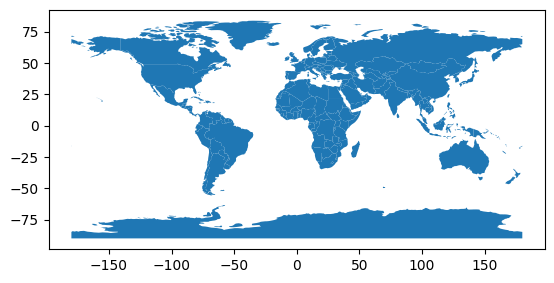

In [5]:
gdf.plot()

An interactive map can be optained with the explore() method.

In [6]:
gdf[gdf['continent'] == 'Africa'].explore()

### The geometry column

The geometry column of class GeoSeries is an essential column in a GeoDataFrame. It contains the geometric part of the vector layer, and is the basis for all spatial operations. This column can be accessed by name, which typically (e.g., when reading from a file) is 'geometry', as in gdf['geometry']. However, the recommendation is to use the fixed `.geometry` property, which refers to the geometry column regardless whether its name is 'geometry' or not. In the case of the gdf object, the `geometry` column contains 'MultiPolygon's associated with each country.

In [7]:
gdf.geometry

0      MULTIPOLYGON (((-180.00000 -16.55522, -179.917...
1      MULTIPOLYGON (((33.90371 -0.95000, 31.86617 -1...
2      MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...
3      MULTIPOLYGON (((-132.71001 54.04001, -133.1800...
4      MULTIPOLYGON (((-171.73166 63.78252, -171.7911...
                             ...                        
172    MULTIPOLYGON (((18.82982 45.90887, 19.07277 45...
173    MULTIPOLYGON (((20.07070 42.58863, 20.25758 42...
174    MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...
175    MULTIPOLYGON (((-61.68000 10.76000, -61.66000 ...
176    MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...
Name: geometry, Length: 177, dtype: geometry

In [8]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

The geometry column also contains the spatial reference information, if any (also accessible with the shortcut gdf.crs).

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Each geometry in a GeoDataFrame is a shapely object.

In [10]:
print(gdf.geometry[0])

MULTIPOLYGON (((-180 -16.555216566639196, -179.9173693847653 -16.501783135649397, -179.79332010904864 -16.02088225674122, -180 -16.06713266364245, -180 -16.555216566639196)), ((178.12557 -17.50481, 177.67087 -17.381140000000002, 177.28504 -17.72465, 177.38146 -18.164320000000004, 177.93266000000003 -18.287990000000004, 178.55271 -18.15059, 178.71806 -17.628460000000004, 178.3736 -17.33992, 178.12557 -17.50481)), ((179.99999 -16.555220437594134, 179.99999 -16.067137982083942, 179.4135093629971 -16.379054277547407, 179.0966093629971 -16.433984277547403, 178.59683859511716 -16.639150000000004, 178.72505936299711 -17.01204167436804, 179.36414266196414 -16.801354076946883, 179.99999 -16.555220437594134)))


### NOTIZ: Audio 53:00
alles Zusammen GeoDatabse?
nur die Lokations -> GeoSeries
nur 1 ausgegeben ->  

In [11]:
type(gdf.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

The geometries use the simple feature standard (see slides). 
They typically are one of the following "big seven": (MULTI-)POINT, (MULTI-)LINESTRING, (MULTI-)POLYGON, GEOMETRYCOLLECTION

We can also create these geometries from scratch.



#### Create geometries from scratch

First, we create the shapely geometry:

In [5]:
point = shapely.Point([13.332, 52.513])

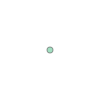

In [6]:
point

In [7]:
print(point)

POINT (13.332 52.513)


Then, we create a GeoSeries from the geometry, thereby also setting the CRS:

In [8]:
geom = gpd.GeoSeries([point], crs=4326)

In [16]:
geom.explore(color='red', marker_kwds={'radius': 15})

Finally, we can create an entire GeoDataFrame:

In [17]:
data = {
  'name': ['A random point in Berlin'],
  'geometry': geom
}

gdf = gpd.GeoDataFrame(data)

In [18]:
gdf

,name,geometry
0,A random point in Berlin,POINT (13.33200 52.51300)


### Spatial data operations: e.g., Compute distances

In [20]:
berlin = gpd.GeoSeries(shapely.Point([13.416, 52.5184]), crs=4326)
hamburg = gpd.GeoSeries(shapely.Point([9.9978, 53.545]), crs=4326)

pd.concat([berlin, hamburg]).explore(color='red', marker_kwds={'radius': 15})

### NOTIT: Berechnen von Distanz:AUDIO 59:00

In [21]:
berlin.distance(hamburg)

/var/folders/m7/jb7xk8h91p541g43zv2r8l740000gn/T/ipykernel_5838/475199252.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  berlin.distance(hamburg)


0    3.569033
dtype: float64

#### Project CRS

In [22]:
berlin_proj = berlin.to_crs(epsg=3035)
hamburg_proj = hamburg.to_crs(epsg=3035)

pd.concat([berlin_proj, hamburg_proj])

0    POINT (4552790.590 3273125.389)
0    POINT (4320854.147 3381922.908)
dtype: geometry

### NOTIZ: das oben ist die Ausgabe in Meter


In [23]:
berlin_proj.distance(hamburg_proj)

0    256186.28647
dtype: float64

### NOTIZ: die ausgabe ist einiger maßen besser und teoretisch benutzbar!

In [24]:
berlin_proj.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

#### Buffers

### NOTIZ: Buffer ist DAS WAS WIR WOLLEN
aber nicht wie in Bsp mit 10 km bzw. 0.5.... ist zu groß

We have a similar issue for buffers. Eg, let's make a buffer around Berlin

In [26]:
berlin.buffer(0.5).explore(color="red", marker_kwds={'radius': 15})

/var/folders/m7/jb7xk8h91p541g43zv2r8l740000gn/T/ipykernel_5838/3757709153.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  berlin.buffer(0.5).explore(color="red", marker_kwds={'radius': 15})


As the buffer is in degrees and 0.5 degrees north is not the same distance as 0.5 degrees east, we see an elipse instead of a circle. To get a circular buffer, we need to transform the data into a metric coordinate system. (0.5 nach oben ist nicht gleich land wie 0.5 nach rechts und links) ! also anders machen

In [27]:
berlin = berlin.to_crs(epsg=3035)

# now we can also indicate the buffer in meters
# let's make a 10 km buffer
berlin.buffer(10_000).explore(radius=15, markerkwds={'radius': 15})

## Loading data from OpenStreetMap

The OSMnx documentation (the Python Library to access the OpenStreetMap API): https://osmnx.readthedocs.io/en/latest/getting-started.htmlmm

Retreive restaurants from OSM:    ... folgendes Sucht nach Restaurants in Berlin (sind 4551)

In [9]:
import osmnx as ox

tags = {"amenity": "restaurant"}

# Retrieve restaurants
restaurants = ox.features_from_place("Berlin", tags)

# How many restaurants do we have?
len(restaurants)

4551

In [10]:
restaurants

addr:city addr:country addr:postcode  \
element_type osmid                                             
node         26735749      Berlin           DE         10623   
             26735759      Berlin           DE         10623   
             26735763      Berlin           DE         10625   
             29997724      Berlin           DE         14057   
             30020303      Berlin           DE         10961   
...                           ...          ...           ...   
way          1196371265    Berlin          NaN         12685   
             1197042968    Berlin          NaN         12683   
             1207104515    Berlin           DE         10707   
             1214875610    Berlin           DE         10557   
             1216038083    Berlin           DE         14169   

                                addr:street     addr:suburb     amenity  \
element_type osmid                                                        
node         26735749       Knesebeckstraße  Charlottenburg  restaurant   
             26735759            Kantstraße  Charlottenburg  restaurant   
             26735763      Pestalozzistraße  Charlottenburg  restaurant   
             29997724       Neue Kantstraße  Charlottenburg  restaurant   
             30020303       Zossener Straße       Kreuzberg  restaurant   
...                                     ...             ...         ...   
way          1196371265         Geißenweide             NaN  restaurant   
             1197042968     Blumberger Damm             NaN  restaurant   
             1207104515  Fehrbelliner Platz     Wilmersdorf  restaurant   
             1214875610    Helgoländer Ufer          Moabit  restaurant   
             1216038083     Berliner Straße      Zehlendorf  restaurant   

                               cuisine                 email  \
element_type osmid                                             
node         26735749    italian;pizza   aida-camillo@web.de   
             26735759            asian                   NaN   
             26735763       vietnamese                   NaN   
             29997724          italian                   NaN   
             30020303          tibetan                   NaN   
...                                ...                   ...   
way          1196371265            NaN                   NaN   
             1197042968            NaN                   NaN   
             1207104515            NaN                   NaN   
             1214875610            NaN  info@patio-berlin.de   
             1216038083            NaN                   NaN   

                                           name  \
element_type osmid                                
node         26735749                      Aida   
             26735759                Madame Ngo   
             26735763                Thanh Long   
             29997724                   La Rose   
             30020303                Tibet Haus   
...                                         ...   
way          1196371265       Kokoro Restaurant   
             1197042968      Lumo Nahbar Berlin   
             1207104515                Parkcafé   
             1214875610  Restaurantschiff Patio   
             1216038083                Elements   

                                                             opening_hours  \
element_type osmid                                                           
node         26735749                    Mo-Sa 11:30-21:00; Su 15:00-21:00   
             26735759    Mo-Sa 12:00-17:00,18:00-22:30; Su 12:00-17:00,...   
             26735763                                                  NaN   
             29997724                                                  NaN   
             30020303                                          12:00-24:00   
...                                                                    ...   
way          1196371265               Tu-Th 16:30-22:00; Fr-Su 12:00-22:00   
             119

In [11]:
restaurants[["name", "cuisine", "geometry"]].explore()

### NOTIT: Umrisse von Bezirke

In [12]:
tags = {"boundary":"administrative"}
gdf =ox.features_from_place("Berlin, Germany", tags)

### NOTIZ:
relation = Polygon ..........
brought = Audio 76:00

In [13]:
# only use multiploygons
gdf.reset_index(inplace=True)
gdf = gdf[gdf.element_type == 'relation']

See this documentation for country specific admin_levels: https://wiki.openstreetmap.org/wiki/Tag:boundary%3Dadministrative#admin_level=*_Country_specific_values

In [14]:
bezirke = gdf[["name", "admin_level", "place", "geometry"]][gdf.place =="borough"]
bezirke

,name,admin_level,place,geometry
1050,Reinickendorf,9,borough,"POLYGON ((13.20820 52.59899, 13.20724 52.59987..."
1051,Spandau,9,borough,"POLYGON ((13.10932 52.45071, 13.10956 52.45108..."
1053,Mitte,9,borough,"POLYGON ((13.30154 52.54881, 13.30288 52.55045..."
1060,Steglitz-Zehlendorf,9,borough,"POLYGON ((13.08835 52.41963, 13.09584 52.42198..."
1077,Treptow-Köpenick,9,borough,"POLYGON ((13.43964 52.48990, 13.43968 52.49003..."
1086,Friedrichshain-Kreuzberg,9,borough,"POLYGON ((13.36858 52.49396, 13.36841 52.49448..."
1117,Tempelhof-Schöneberg,9,borough,"POLYGON ((13.32000 52.46700, 13.31999 52.46716..."
1122,Neukölln,9,borough,"POLYGON ((13.39949 52.41802, 13.39992 52.41854..."
1124,Marzahn-Hellersdorf,9,borough,"POLYGON ((13.51688 52.53555, 13.51704 52.53556..."
1126,Pankow,9,borough,"MULTIPOLYGON (((13.50344 52.61899, 13.50360 52..."


In [15]:
# Bezirke
bezirke.explore()

If larger data amounts are needed, you can use the `pyrosm` package. 
The example below will get you the entire road network of Berlin suitable for cycling (this will take a few minutes to run).

In [ ]:
import pyrosm

# download pbf file
fp = pyrosm.get_data("Berlin", directory="data")
berlin_osm = pyrosm.OSM(fp)

cycle_net_berlin_bbox = berlin_osm.get_network(network_type="cycling")
#cycle_net_berlin.plot()

# crop to Berlin extent: get administrative boundary from pbf
boundaries = berlin_osm.get_boundaries(name="Berlin")
berlin_boundary = boundaries[boundaries.name=="Berlin"].reset_index().geometry[0]

# intersect with Berlin boundary
cycle_net_berlin = cycle_net_berlin_bbox.intersection(berlin_boundary)
cycle_net_berlin.plot()

In [163]:
# Get all walkable roads and the nodes 
nodes, edges = berlin_osm.get_network(nodes=True)

G = berlin_osm.to_graph(nodes, edges, graph_type="networkx")
# takes about 20 min
# ox.plot_graph(G)
ox.get_nearest_edge(G, berlin.geometry.x, berlin.geometry.y, return_dist=True)

## CSV to GeoDataFrame

### NOTIZ: 
über den Link .... 

In [126]:
test_data = pd.read_csv("https://raw.githubusercontent.com/FreeMoveProject/dp_mobility_report/main/tests/test_files/test_data.csv")
test_data

,uid,tid,datetime,lat,lng
0,0,11,2020-12-13 06:07:29,52.5210,13.3540
1,0,11,2020-12-13 08:04:51,52.5114,13.3623
2,0,32,2020-12-17 17:36:54,52.5254,13.2941
3,0,32,2020-12-17 17:48:44,52.5062,13.3305
4,0,34,2020-12-18 23:26:17,52.5281,13.3416
...,...,...,...,...,...
196,19,93,2020-12-14 00:13:20,52.5370,13.3731
197,19,93,2020-12-14 01:23:39,52.4727,13.4474
198,19,95,2020-12-17 16:31:15,52.5172,13.4496
199,19,95,2020-12-17 17:25:14,52.4874,13.3818


In [130]:
gdf = gpd.GeoDataFrame(test_data, geometry=gpd.points_from_xy(test_data.lat, test_data.lng), crs = 4326)
gdf.explore(color="red")

Now we are somewhere in the ocean, even though we expected points in Berlin. What happened?

Be sure to check the correct order of latitude and longitude!

.... die Reihenfolge ändern!

In [129]:
gdf = gpd.GeoDataFrame(test_data, geometry=gpd.points_from_xy(test_data.lng, test_data.lat), crs = 4326)
gdf.explore(color="red")